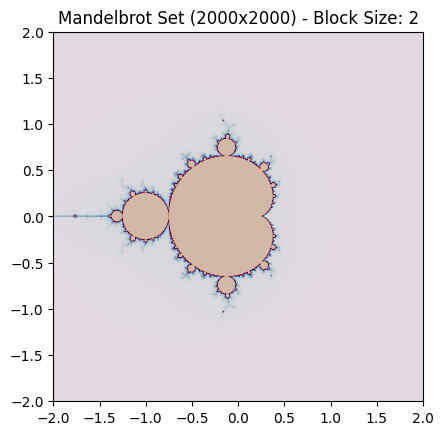

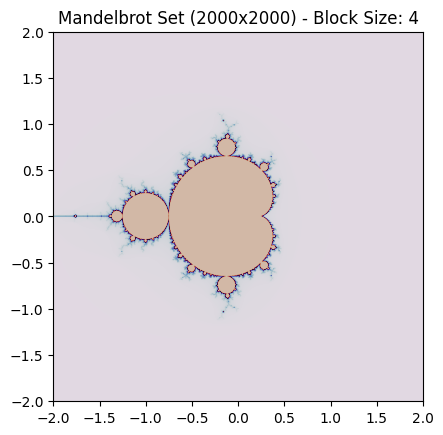

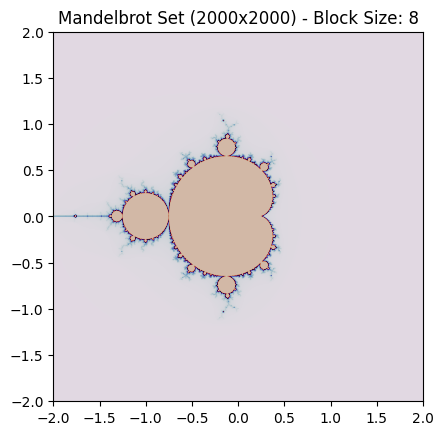

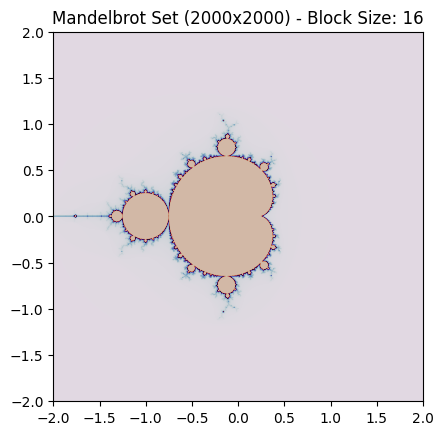

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
import warnings
warnings.filterwarnings("ignore")

@njit(parallel=True)
def mandelbrot(c, max_iter):
    z = c
    for n in range(max_iter):
        if abs(z) > 2.0:
            return n
        z = z * z + c
    return max_iter

def mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter, block_size):
    result = np.zeros((height, width), dtype=np.uint8)

    x_step = (x_max - x_min) / width
    y_step = (y_max - y_min) / height

    for i in prange(0, height, block_size):
        for j in prange(0, width, block_size):
            for x in range(i, min(i + block_size, height)):
                for y in range(j, min(j + block_size, width)):
                    real = x_min + y * x_step
                    imag = y_min + x * y_step
                    c = complex(real, imag)
                    result[x, y] = mandelbrot(c, max_iter)

    return result

def plot_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter, block_size):
    mandelbrot_image = mandelbrot_set(x_min, x_max, y_min, y_max, width, height, max_iter, block_size)

    plt.imshow(mandelbrot_image, cmap='twilight', extent=(x_min, x_max, y_min, y_max))
    plt.title(f'Mandelbrot Set ({width}x{height}) - Block Size: {block_size}')
    plt.show()

# Test the code with a 2000x2000 grid and different block sizes
x_min, x_max = -2, 2
y_min, y_max = -2, 2
width, height = 2000, 2000
max_iter = 1000

block_sizes = [2, 4, 8, 16]  # You can add more block sizes to test

for block_size in block_sizes:
    plot_mandelbrot(x_min, x_max, y_min, y_max, width, height, max_iter, block_size)
